# CASE STUDY - LEAD SCORING

In [171]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
# Importing dataset
leads = pd.read_csv("Leads.csv", encoding = 'utf-8')

### Let's understand the structure of our dataframe

In [173]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [174]:
leads.shape

(9240, 37)

In [175]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [176]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [177]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [178]:
# Check if any duplicate Prospect ID is present in the data
print(any(leads['Prospect ID'].duplicated()))

False


In [179]:
# many values in in Lead Profile and City is Select, we replace them with NaN
leads = leads.replace('Select', np.NaN, regex=True)

In [180]:
# Get the percent of null values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [181]:
len(leads.columns)

37

### Data Preparation

In [182]:
# Drop columns having more than 30% NaN values
leads = leads.drop(leads.loc[:, list(round(100*(leads.isnull().sum()/len(leads.index)), 2) > 30)], axis = 1)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [183]:
len(leads.columns)

27

In [184]:
# Get the percent of null values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [185]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'X Education Forums', 'Newspaper Article', 'Newspaper', 'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [186]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,0,Modified


In [187]:
#deleting columns having  0 in all the rows 
leads = leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], 1)

In [188]:
#deleting columns having same values in more than 95% of rows
leads = leads.drop(["Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
                "Through Recommendations"], axis=1)

In [189]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [190]:
# Get the percent of null values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

In [191]:
# Replacing more than 25% empty columns with "Other"
# Fill occupation NaN column with "Other"
leads["What is your current occupation"].fillna('Other',inplace=True)
leads["Country"].fillna('Other',inplace=True)

In [192]:
# Renaming lead source with visually similar name
# Replacing google with Google
leads['Lead Source']=leads['Lead Source'].replace('google','Google')

In [193]:
# Counting unique values in each remaining column with high NaN values

temp = leads.groupby('Country')['Prospect ID'].nunique()
temp

Country
Asia/Pacific Region        2
Australia                 13
Bahrain                    7
Bangladesh                 2
Belgium                    2
Canada                     4
China                      2
Denmark                    1
France                     6
Germany                    4
Ghana                      2
Hong Kong                  7
India                   6492
Indonesia                  1
Italy                      2
Kenya                      1
Kuwait                     4
Liberia                    1
Malaysia                   1
Netherlands                2
Nigeria                    4
Oman                       6
Other                   2461
Philippines                2
Qatar                     10
Russia                     1
Saudi Arabia              21
Singapore                 24
South Africa               4
Sri Lanka                  1
Sweden                     3
Switzerland                1
Tanzania                   1
Uganda                     2
United

In [194]:
temp = leads.groupby('What is your current occupation')['Prospect ID'].nunique()
temp

What is your current occupation
Businessman                8
Housewife                 10
Other                   2706
Student                  210
Unemployed              5600
Working Professional     706
Name: Prospect ID, dtype: int64

In [195]:
temp = leads.groupby('What matters most to you in choosing a course')['Prospect ID'].nunique()
temp

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: Prospect ID, dtype: int64

In [196]:
# Dropping 'What matters most to you in choosing a course' because it contains only 3 values most of which are negligible.
leads = leads.drop(['What matters most to you in choosing a course'], axis=1)

In [197]:
# Get the percent of null values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Country                                   0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [198]:
# Assuming remaining columns with NaN values can be replaced with 0 if data is not present accordingly
leads['TotalVisits'].fillna(0, inplace=True)
leads['Page Views Per Visit'].fillna(0, inplace=True)

In [199]:
# Removing rows having NaN's
leads.dropna(axis=0, inplace=True)

In [200]:
# Get the percent of null values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [201]:
# Dropping prospect ID, lead number and country as these values wont help in determing lead score
leads = leads.drop(['Prospect ID', 'Lead Number', 'Country'], axis=1)

In [202]:
# checking number of records present
leads.shape

(9103, 11)

## Visualisation

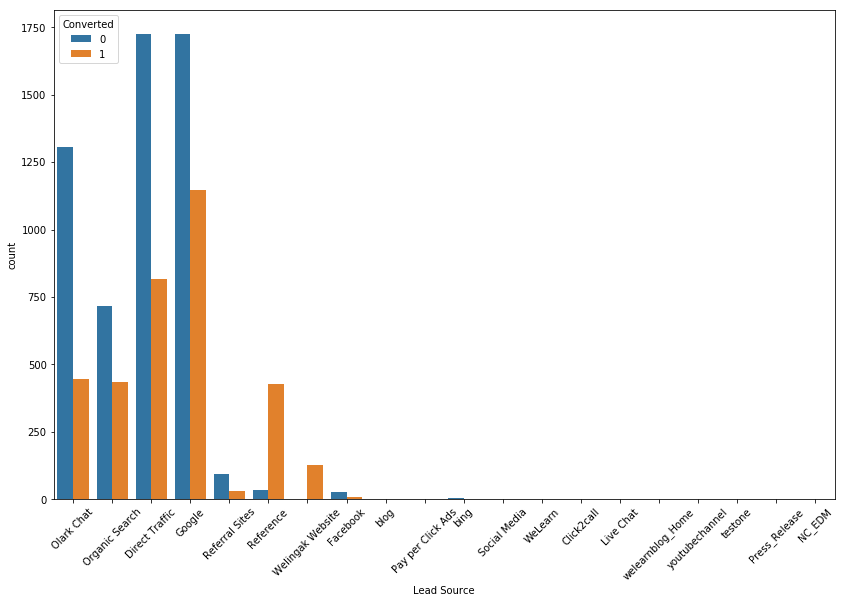

In [203]:
plt.figure(figsize=(14,9))
sns.countplot(x="Lead Source",hue="Converted",data=leads)
plt.xticks(rotation=45)
plt.show()

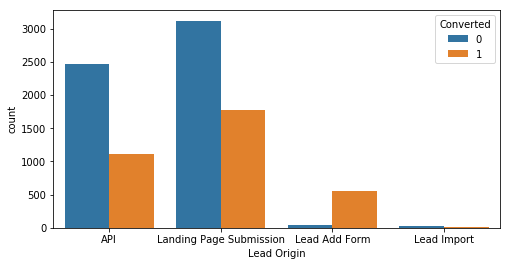

In [204]:
plt.figure(figsize=(8,4))
sns.countplot(x="Lead Origin",hue="Converted",data=leads)
plt.show()

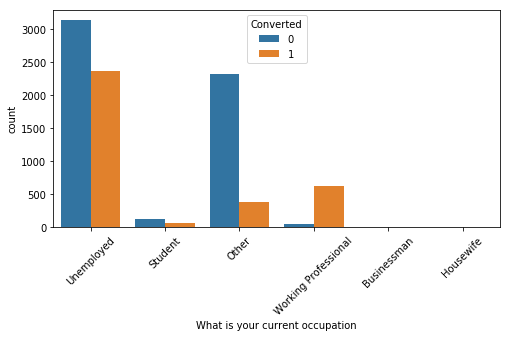

In [205]:
plt.figure(figsize=(8,4))
sns.countplot(x="What is your current occupation",hue="Converted",data=leads)
plt.xticks(rotation=45)
plt.show()

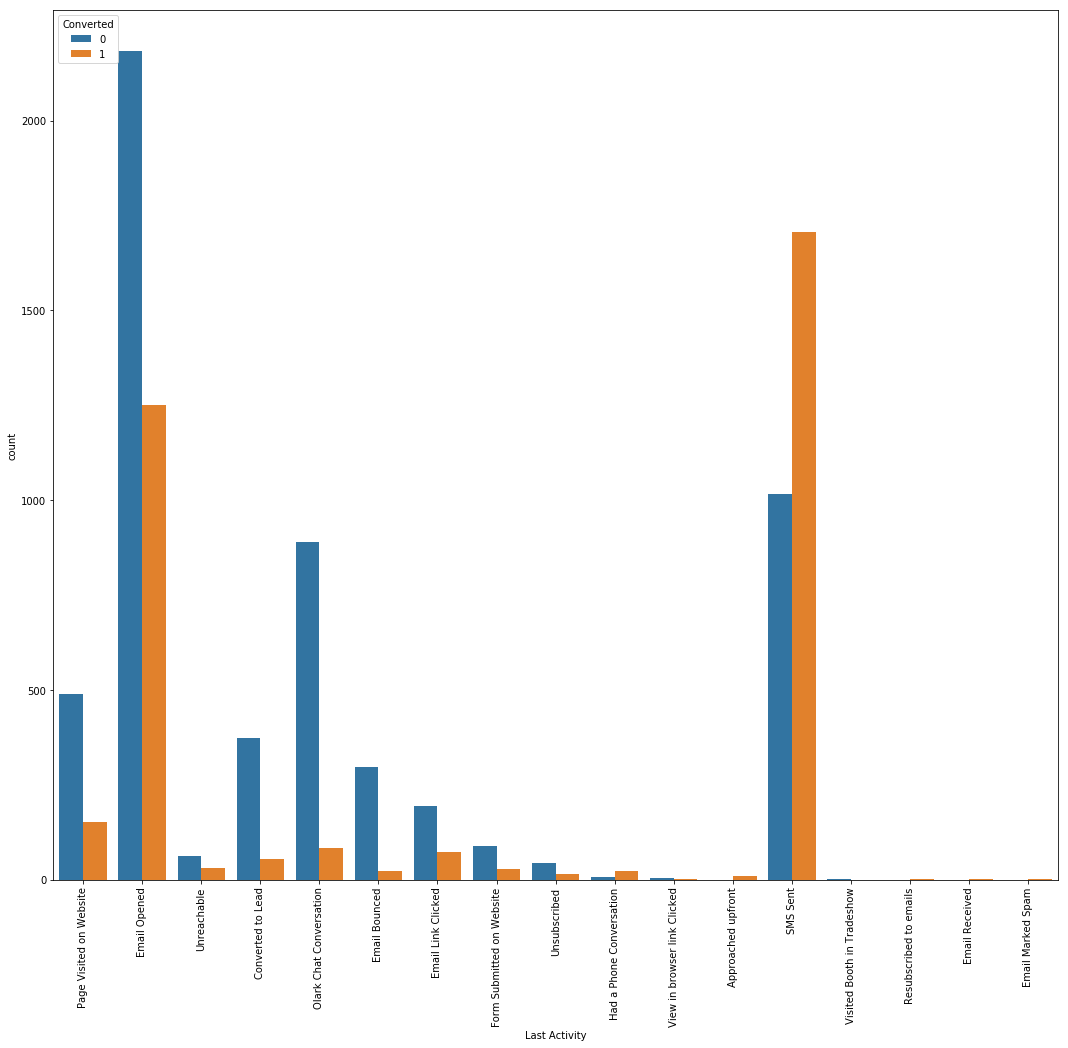

In [206]:
plt.figure(figsize=(18,16))
sns.countplot(x="Last Activity",hue="Converted",data=leads)
plt.xticks(rotation=90)
plt.show()

In [207]:
# Checking and removing outliers from continuous variables in the data (95%)

In [208]:
TotalVisits=leads["TotalVisits"].quantile(.95)
leads = leads.loc[(leads["TotalVisits"] <= TotalVisits)]

In [209]:
TotalVisits=leads["Total Time Spent on Website"].quantile(.95)
leads = leads.loc[(leads["Total Time Spent on Website"] <= TotalVisits)]

In [210]:
TotalVisits=leads["Page Views Per Visit"].quantile(.95)
leads = leads.loc[(leads["Page Views Per Visit"] <= TotalVisits)]

## Dummy Variable Creation

In [211]:
print(leads.shape)

(8053, 11)


In [212]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
leads = pd.get_dummies(leads, drop_first=True)

In [213]:
print(leads.shape)
leads.head()

(8053, 64)


,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Checking the converted rate

In [214]:
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

35.97417111635416

# Test-Train Split

In [215]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads.drop(['Converted'],axis=1)

# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [216]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [217]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

## Feature Scaling

In [218]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7644,0,-0.298327,1.745919,-0.014234,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5341,0,0.129361,-0.242135,-0.618424,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6489,0,0.557049,-0.203739,1.194147,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
437,0,-1.153702,-0.858602,-1.222614,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4587,0,-1.153702,-0.858602,-1.222614,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Looking at correlations

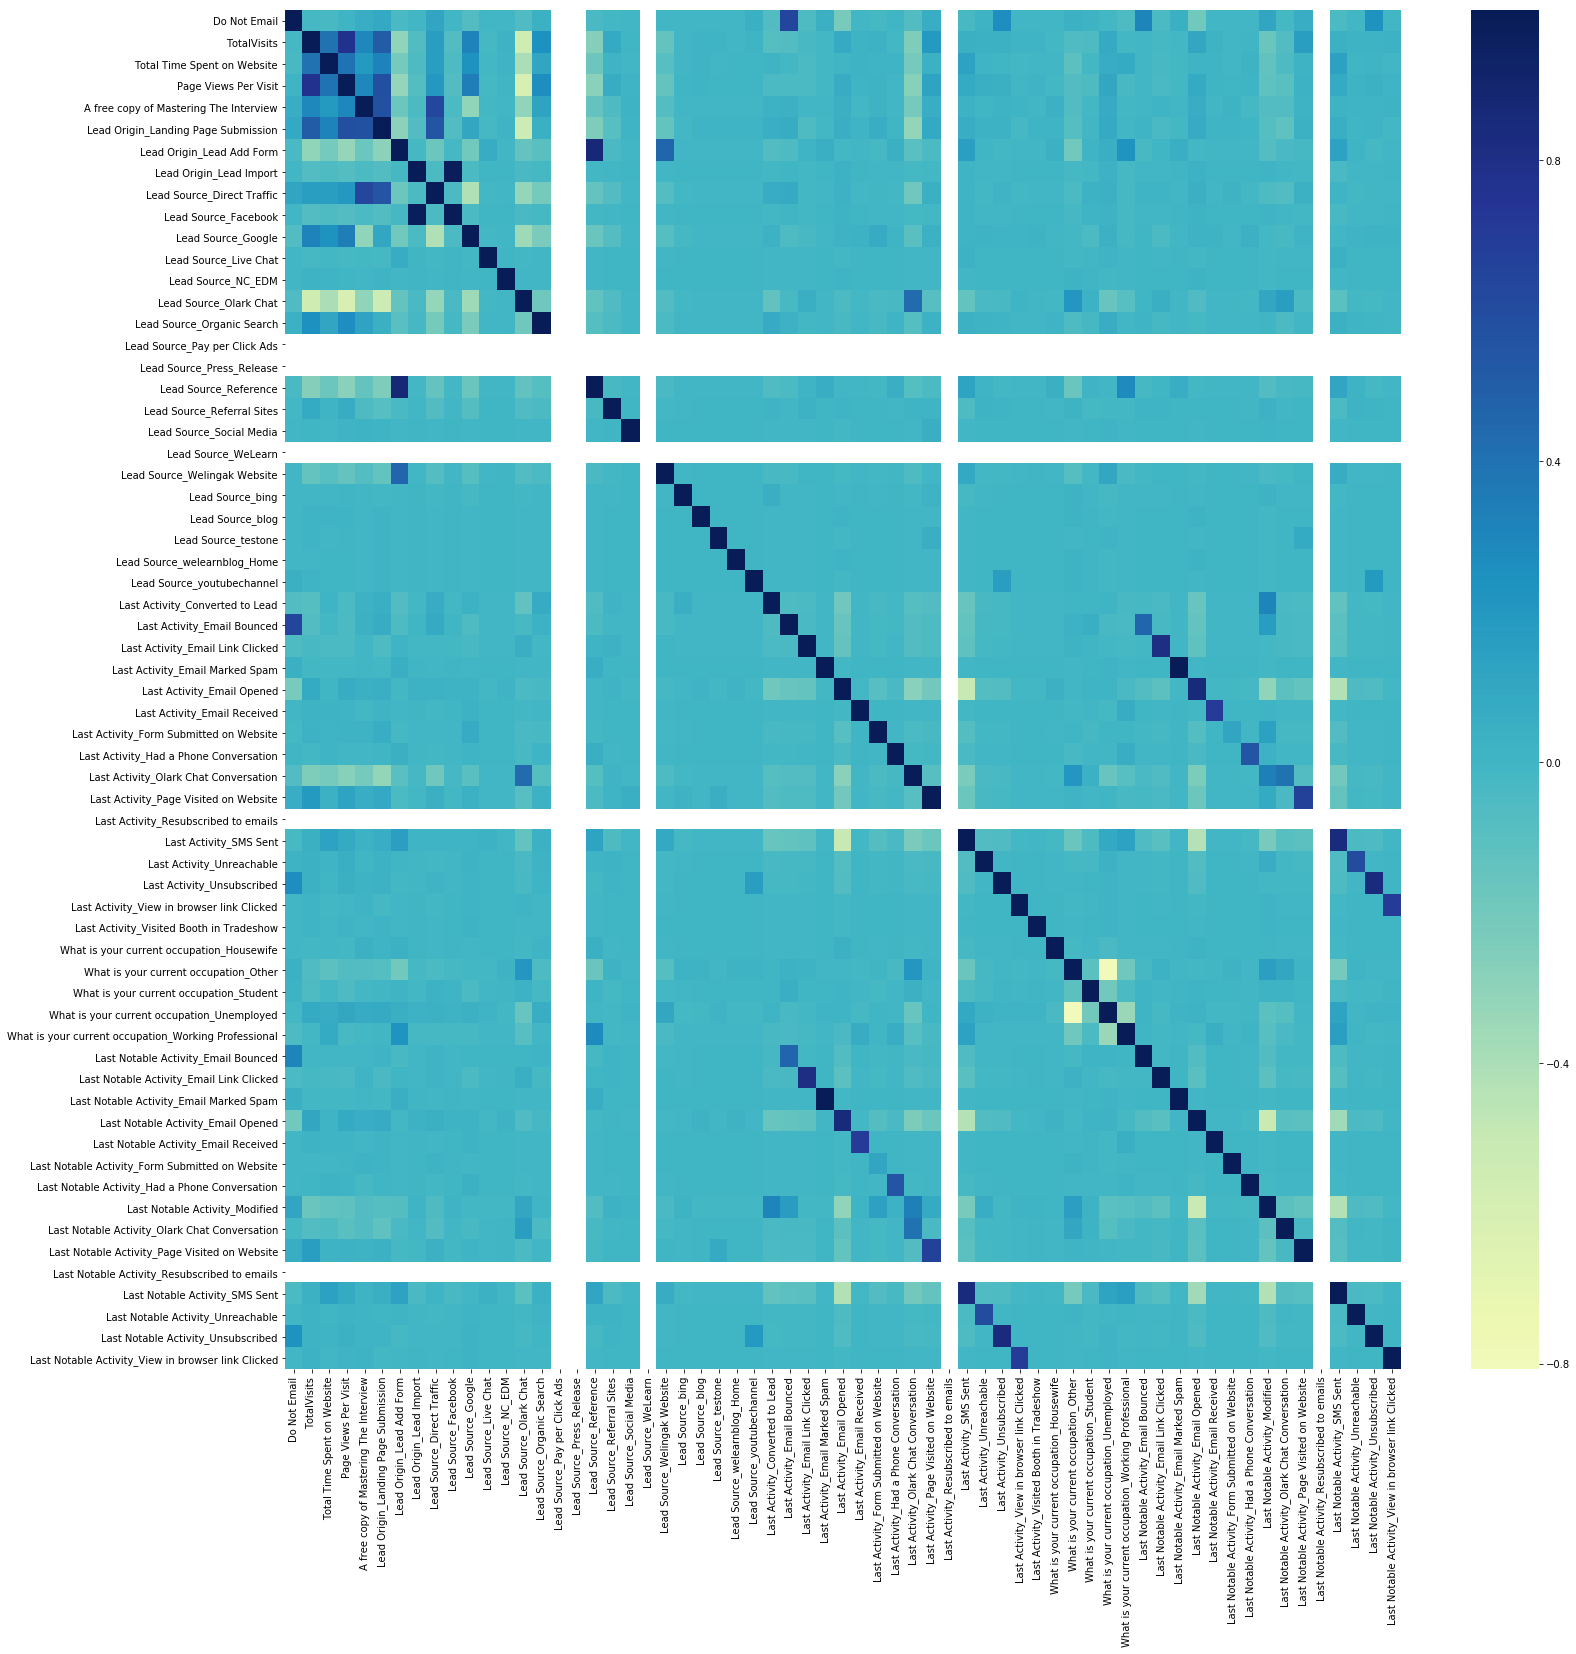

In [219]:
plt.figure(figsize=(25,25))
corr = X_train.corr() 
sns.heatmap(corr, center=0, cmap="YlGnBu")

In [220]:
# Selecting columns having correlation greater than 0.7
rows, cols = X_train.shape
col = list(X_train.columns)

corr = X_train.corr().values

for i in range(cols):
    for j in range(i+1, cols):
        if corr[i,j] > 0.7:
            print(col[i], ' ', col[j], ' ', corr[i,j])

TotalVisits   Page Views Per Visit   0.7763174744500873
Lead Origin_Lead Add Form   Lead Source_Reference   0.8691741172787443
Lead Origin_Lead Import   Lead Source_Facebook   0.9779322000911583
Last Activity_Email Link Clicked   Last Notable Activity_Email Link Clicked   0.8121205401280028
Last Activity_Email Marked Spam   Last Notable Activity_Email Marked Spam   1.0
Last Activity_Email Opened   Last Notable Activity_Email Opened   0.8582292709195994
Last Activity_Email Received   Last Notable Activity_Email Received   0.70704404714201
Last Activity_SMS Sent   Last Notable Activity_SMS Sent   0.8499633570744489
Last Activity_Unsubscribed   Last Notable Activity_Unsubscribed   0.8357645642441685
Last Activity_View in browser link Clicked   Last Notable Activity_View in browser link Clicked   0.707044047142013


In [221]:
# Removing Highly corelated variables
X_train.drop(['Lead Source_Reference','Lead Source_Facebook','Last Notable Activity_Email Link Clicked',
              'Last Notable Activity_Email Marked Spam','Last Notable Activity_Email Opened','Last Notable Activity_Email Received',
              'Last Notable Activity_Resubscribed to emails','Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed',
              'Last Notable Activity_View in browser link Clicked'], axis=1, inplace=True)

X_test.drop(['Lead Source_Reference','Lead Source_Facebook','Last Notable Activity_Email Link Clicked',
              'Last Notable Activity_Email Marked Spam','Last Notable Activity_Email Opened','Last Notable Activity_Email Received',
              'Last Notable Activity_Resubscribed to emails','Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed',
              'Last Notable Activity_View in browser link Clicked'], axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Model Building

In [222]:
# Importing library for statsmodels
import statsmodels.api as sm

# Importing library for calculating metrics
from sklearn import metrics

In [223]:
# Running Logistic regression model
logistic_model_1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logistic_model_1 .fit().summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5637
Model:                            GLM   Df Residuals:                     5587
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2135.6
Date:                Mon, 17 Jun 2019   Deviance:                       4271.2
Time:                        23:00:07   Pearson chi2:                 5.38e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  -22.3581      1e+05     -0.000      1.000   -1.96e+05    1.96e+05
Do Not Email                                            -1.2486      0.240     -5.212      0.000      -1.718      -0.779
TotalVisits                                              0.2937      0.062      4.749      0.000       0.172       0.415
Total Time Spent on Website                              1.0909      0.045     24.356      0.000       1.003       1.179
Page Views Per Visit                                    -0.2847      0.071     -4.030      0.000      -0.423      -0.146
A free copy of Mastering The Interview                   0.0318      0.125      0.254      0.800      -0.214       0.277
Lead Origin_Landing Page Submission                     -0.2441      0.125     -1.952      0.051      -0.489       0.001
Lead Origin_Lead Add Form                               26.4584   5.32e+04      0.000      1.000   -1.04e+05    1.04e+05
Lead Origin_Lead Import                                 23.3719   5.32e+04      0.000      1.000   -1.04e+05    1.04e+05
Lead Source_Direct Traffic                              22.5658   5.32e+04      0.000      1.000   -1.04e+05    1.04e+05
Lead Source_Google                                      22.9028   5.32e+04      0.000      1.000   -1.04e+05    1.04e+05
Lead Source_Live Chat                                   20.4863   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      46.8880   9.56e+04      0.000      1.000   -1.87e+05    1.87e+05
Lead Source_Olark Chat                                  24.1188   5.32e+04      0.000      1.000   -1.04e+05    1.04e+05
Lead Source_Organic Search                              22.5623   5.32e+04      0.000      1.000   -1.04e+05    1.04e+05
Lead Source_Pay per Click Ads                        -3.913e-09   3.32e-05     -0.000      1.000   -6.51e-05    6.51e-05
Lead Source_Press_Release                            -4.655e-09   7.98e-05  -5.84e-05      1.000      -0.000       0.000
Lead Source_Referral Sites                              22.5820   5.32e+04      0.000      1.000   -1.04e+05    1.04e+05
Lead Source_Social Media                                 2.1304   9.56e+04   2.23e-05      1.000   -1.87e+05    1.87e+05
Lead Source_WeLearn                                  -7.211e-10   1.82e-05  -3.96e-05      1.000   -3.57e-05    3.57e-05
Lead Source_Welingak Website                             2.2632      1.035      2.187      0.029       0.235       4.291
Lead Source_bing                                         2.0500   6.53e+04   3.14e-05      1.000   -1.28e+05    1.28e+05
Lead Source_blog                                         1.1108   9.56e+04   1.16e-05      1.000   -1.87e+05    1.87e+05
Lead Source_test

In [224]:
# Importing RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [225]:
rfe = RFE(logreg, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [226]:
rfe.support_

array([ True, False,  True,  True, False, False,  True, False,  True,
        True, False,  True,  True,  True, False, False,  True, False,
       False,  True,  True, False, False, False, False,  True,  True,
        True,  True, False, False, False,  True,  True,  True, False,
        True, False, False,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True])

In [227]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 17),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 11),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 22),
 ('Lead Source_Press_Release', False, 24),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_WeLearn', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', True, 1),
 ('Lead Source_blog', False, 7),
 ('Lead Source_testone', False, 5),
 ('Lead Source_welearnblog_Home', False, 9),
 ('Lead Source_youtubechannel', False, 12),
 

In [228]:
# Selecting only those columns having ranking as 1
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last

In [229]:
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5637
Model:                            GLM   Df Residuals:                     5606
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2154.5
Date:                Mon, 17 Jun 2019   Deviance:                       4309.0
Time:                        23:00:08   Pearson chi2:                 5.35e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  -22.2053   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Do Not Email                                            -1.2277      0.217     -5.646      0.000      -1.654      -0.801
Total Time Spent on Website                              1.1004      0.045     24.721      0.000       1.013       1.188
Page Views Per Visit                                    -0.1714      0.059     -2.893      0.004      -0.287      -0.055
Lead Origin_Lead Add Form                                3.4548      0.554      6.238      0.000       2.369       4.540
Lead Source_Direct Traffic                              -0.4129      0.519     -0.796      0.426      -1.430       0.604
Lead Source_Google                                       0.0091      0.519      0.017      0.986      -1.008       1.026
Lead Source_NC_EDM                                      23.3338   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.1247      0.515      2.186      0.029       0.116       2.133
Lead Source_Organic Search                              -0.2502      0.531     -0.472      0.637      -1.290       0.790
Lead Source_Referral Sites                              -0.1243      0.635     -0.196      0.845      -1.369       1.121
Lead Source_Welingak Website                             2.2457      1.035      2.171      0.030       0.218       4.273
Lead Source_bing                                       -19.9211   2.27e+04     -0.001      0.999   -4.45e+04    4.45e+04
Last Activity_Converted to Lead                         -0.5073      0.230     -2.206      0.027      -0.958      -0.056
Last Activity_Email Bounced                             -0.9505      0.417     -2.281      0.023      -1.767      -0.134
Last Activity_Email Link Clicked                        -0.4935      0.230     -2.144      0.032      -0.945      -0.042
Last Activity_Email Marked Spam                         21.9208   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_Had a Phone Conversation                  -1.8711      1.070     -1.748      0.080      -3.969       0.226
Last Activity_Olark Chat Conversation                   -1.0649      0.219     -4.866      0.000      -1.494      -0.636
Last Activity_Page Visited on Website                   -0.4080      0.184     -2.223      0.026      -0.768      -0.048
Last Activity_SMS Sent                                   1.2099      0.087     13.840      0.000       1.039       1.381
Last Activity_View in browser link Clicked             -21.2029   3.39e+04     -0.001      1.000   -6.64e+04    6.64e+04
What is your current occupation_Housewife               44.4316   5.17e+04      0.001      0.999   -1.01e+05    1.01e+05
What is your cur

In [230]:
# Importing library for VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [231]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
24,What is your current occupation_Unemployed,114.06
5,Lead Source_Google,61.84
22,What is your current occupation_Other,60.00
4,Lead Source_Direct Traffic,53.38
7,Lead Source_Olark Chat,41.98


In [232]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [233]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [234]:
# Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,1,0.664653,7644,1
1,0,0.056957,5341,0
2,0,0.079929,6489,0
3,0,0.100505,437,0
4,1,0.392394,4587,0


In [235]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8261486606350896


### Dropping insignificant variable

In [236]:
col = col.drop('What is your current occupation_Unemployed', 1)

In [237]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

# Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

vif.head()
res.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8263260599609722


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5637
Model:                            GLM   Df Residuals:                     5607
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2154.8
Date:                Mon, 17 Jun 2019   Deviance:                       4309.5
Time:                        23:00:09   Pearson chi2:                 5.35e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8461      0.513     -1.650      0.099      -1.851       0.159
Do Not Email                                            -1.2274      0.217     -5.644      0.000      -1.654      -0.801
Total Time Spent on Website                              1.1004      0.045     24.719      0.000       1.013       1.188
Page Views Per Visit                                    -0.1711      0.059     -2.888      0.004      -0.287      -0.055
Lead Origin_Lead Add Form                                3.4549      0.554      6.238      0.000       2.369       4.540
Lead Source_Direct Traffic                              -0.4150      0.519     -0.800      0.424      -1.432       0.602
Lead Source_Google                                       0.0083      0.519      0.016      0.987      -1.008       1.025
Lead Source_NC_EDM                                      23.3329   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.1243      0.515      2.185      0.029       0.116       2.133
Lead Source_Organic Search                              -0.2512      0.531     -0.473      0.636      -1.291       0.789
Lead Source_Referral Sites                              -0.1248      0.635     -0.197      0.844      -1.370       1.120
Lead Source_Welingak Website                             2.2455      1.035      2.170      0.030       0.218       4.273
Lead Source_bing                                       -19.9221   2.27e+04     -0.001      0.999   -4.45e+04    4.45e+04
Last Activity_Converted to Lead                         -0.5046      0.230     -2.194      0.028      -0.955      -0.054
Last Activity_Email Bounced                             -0.9490      0.417     -2.278      0.023      -1.766      -0.132
Last Activity_Email Link Clicked                        -0.4927      0.230     -2.141      0.032      -0.944      -0.042
Last Activity_Email Marked Spam                         21.9202   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_Had a Phone Conversation                  -1.8690      1.070     -1.746      0.081      -3.967       0.229
Last Activity_Olark Chat Conversation                   -1.0628      0.219     -4.857      0.000      -1.492      -0.634
Last Activity_Page Visited on Website                   -0.4067      0.183     -2.216      0.027      -0.766      -0.047
Last Activity_SMS Sent                                   1.2107      0.087     13.850      0.000       1.039       1.382
Last Activity_View in browser link Clicked             -21.2016   3.39e+04     -0.001      1.000   -6.64e+04    6.64e+04
What is your current occupation_Housewife               23.0738   1.88e+04      0.001      0.999   -3.68e+04    3.68e+04
What is your cur

### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

# Metrics beyond simply accuracy

In [238]:
# Let's take a look at the confusion matrix 
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion1

array([[3291,  342],
       [ 637, 1367]])

In [239]:
from sklearn.metrics import confusion_matrix

TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [240]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity:",TP / float(TP+FN))
print("\n")

# Let us calculate specificity
print("Specificity:",TN / float(TN+FP))

Sensitivity: 0.6821357285429142


Specificity: 0.9058629232039637


In [241]:
# Calculate false postive rate - predicting Convert when customer does not have Converted
print(FP/ float(TN+FP))

0.09413707679603633


In [242]:
# positive predictive value 
print('positive predictive value:',TP / float(TP+FP))
print("\n")

# Negative predictive value
print('Negative predictive value:',TN / float(TN+ FN))

positive predictive value: 0.7998829724985371


Negative predictive value: 0.8378309572301426


# Plotting the ROC Curve 

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [243]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [244]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Convert_Prob, drop_intermediate = False )

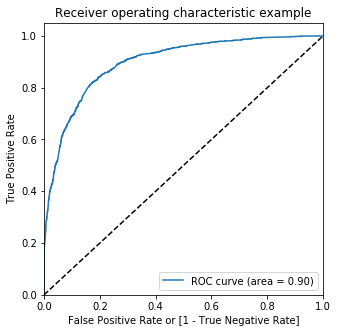

In [245]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

In [246]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3633
           1       0.80      0.68      0.74      2004

   micro avg       0.83      0.83      0.83      5637
   macro avg       0.82      0.79      0.80      5637
weighted avg       0.82      0.83      0.82      5637



# Finding Optimal Cutoff Point

In [247]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.664577,7644,1,1,1,1,1,1,1,1,0,0,0
1,0,0.056985,5341,0,1,0,0,0,0,0,0,0,0,0
2,0,0.079992,6489,0,1,0,0,0,0,0,0,0,0,0
3,0,0.100489,437,0,1,1,0,0,0,0,0,0,0,0
4,1,0.392659,4587,0,1,1,1,1,0,0,0,0,0,0
5,0,0.054913,7479,0,1,0,0,0,0,0,0,0,0,0
6,1,0.969147,3425,1,1,1,1,1,1,1,1,1,1,1
7,1,0.866833,3212,1,1,1,1,1,1,1,1,1,1,0
8,1,0.679903,6021,1,1,1,1,1,1,1,1,0,0,0
9,0,0.144142,4874,0,1,1,0,0,0,0,0,0,0,0


In [248]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','precision','recall'])
from sklearn.metrics import confusion_matrix

num = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    recall = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,precision, recall ]
print(cutoff_df)

     prob  accuracy     sensi     speci  precision    recall
0.9   0.9  0.744190  0.298403  0.990091   0.943218  0.298403
0.8   0.8  0.776299  0.417166  0.974401   0.899892  0.417166
0.7   0.7  0.797587  0.510978  0.955684   0.864135  0.510978
0.6   0.6  0.821359  0.618263  0.933388   0.836597  0.618263
0.5   0.5  0.826326  0.682136  0.905863   0.799883  0.682136
0.4   0.4  0.826503  0.749002  0.869254   0.759615  0.749002
0.3   0.3  0.813021  0.850798  0.792183   0.693089  0.850798
0.2   0.2  0.777896  0.908184  0.706028   0.630194  0.908184
0.1   0.1  0.637573  0.967565  0.455546   0.495022  0.967565
0.0   0.0  0.355508  1.000000  0.000000   0.355508  1.000000


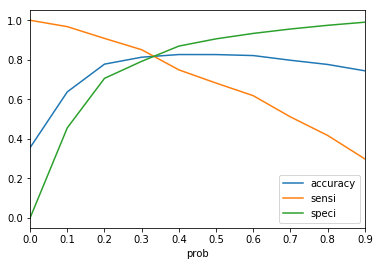

In [249]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<Figure size 432x432 with 0 Axes>

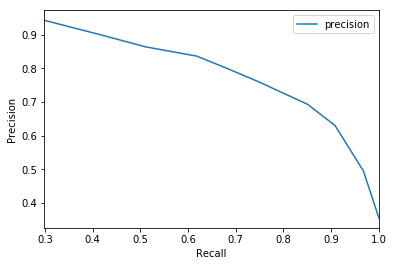

In [250]:
# Let's plot precision and recall for various probabilities.
cutoff_df_pre_rec = cutoff_df[['prob','precision','recall']]

# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(6,6))
cutoff_df_pre_rec.plot.line(x= 'recall' , y='precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [251]:
# Predicting final_predicted for leads
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.664577,7644,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.056985,5341,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.079992,6489,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.100489,437,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.392659,4587,0,1,1,1,1,0,0,0,0,0,0,1


In [252]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8217136774880256

In [253]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2977,  656],
       [ 349, 1655]])

In [254]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))
print("\n")

# Let us calculate specificity
print("Specificity",TN / float(TN+FP))

Sensitivity 0.8258483033932136


Specificity 0.8194329755023396


In [255]:
# Calculate false postive rate - predicting Convert when customer does not have Converted
print("false postive rate",FP/ float(TN+FP))
print("\n")

# Positive predictive value 
print("Positive predictive value",TP / float(TP+FP))
print("\n")

# Negative predictive value
print("Negative predictive value",TN / float(TN+ FN))

false postive rate 0.18056702449766032


Positive predictive value 0.7161401990480312


Negative predictive value 0.8950691521346963


### Precision and Recall


In [256]:
# Looking at the confusion matrix again
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[2977,  656],
       [ 349, 1655]])

In [257]:
# Precision
TP / TP + FP

print("Precision score:",confusion3[1,1]/(confusion3[0,1]+confusion3[1,1]))

# Recall
TP / TP + FN

print("Recall score:",confusion3[1,1]/(confusion3[1,0]+confusion3[1,1]))

Precision score: 0.7161401990480312
Recall score: 0.8258483033932136


### Precision and recall tradeoff

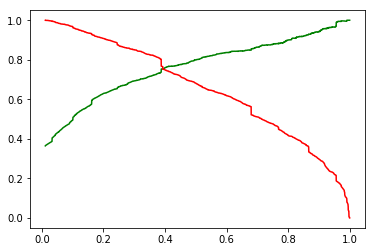

In [258]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Since Precision and recall tradeoff is giving cutoff 0.4 so again predicting for cutoff 0.4


In [259]:
# Predicting final_predicted for leads
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.664577,7644,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.056985,5341,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.079992,6489,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.100489,437,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.392659,4587,0,1,1,1,1,0,0,0,0,0,0,0


In [260]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2_1

array([[3158,  475],
       [ 503, 1501]])

In [261]:
TP = confusion2_1[1,1] # true positive 
TN = confusion2_1[0,0] # true negatives
FP = confusion2_1[0,1] # false positives
FN = confusion2_1[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity",TN / float(TN+FP))

# Calculate false postive rate - predicting Convert when customer does not have Converted
print("false postive rate",FP/ float(TN+FP))

# Positive predictive value 
print("Positive predictive value",TP / float(TP+FP))

# Negative predictive value
print("Negative predictive value",TN / float(TN+ FN))

# Precision
TP / TP + FP

print("Precision score:",confusion2_1[1,1]/(confusion2_1[0,1]+confusion2_1[1,1]))

# Recall
TP / TP + FN

print("Recall score:",confusion2_1[1,1]/(confusion2_1[1,0]+confusion2_1[1,1]))

Sensitivity 0.749001996007984
Specificity 0.8692540600055051
false postive rate 0.1307459399944949
Positive predictive value 0.7596153846153846
Negative predictive value 0.8626058453974323
Precision score: 0.7596153846153846
Recall score: 0.749001996007984


### But our target conversion rate i.e. precision is 80%, so to achieve this we need cutoff probability 0.5.

In [262]:
# Predicting final_predicted for leads
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.664577,7644,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.056985,5341,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.079992,6489,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.100489,437,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.392659,4587,0,1,1,1,1,0,0,0,0,0,0,0


In [263]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2_2

array([[3291,  342],
       [ 637, 1367]])

In [264]:
TP = confusion2_2[1,1] # true positive 
TN = confusion2_2[0,0] # true negatives
FP = confusion2_2[0,1] # false positives
FN = confusion2_2[1,0] # false negatives


# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity",TN / float(TN+FP))

# Calculate false postive rate - predicting Convert when customer does not have Converted
print("false postive rate",FP/ float(TN+FP))

# Positive predictive value 
print("Positive predictive value",TP / float(TP+FP))

# Negative predictive value
print("Negative predictive value",TN / float(TN+ FN))

# Precision
TP / TP + FP

print("Precision score:",confusion2_1[1,1]/(confusion2_1[0,1]+confusion2_1[1,1]))

# Recall
TP / TP + FN

print("Recall score:",confusion2_1[1,1]/(confusion2_1[1,0]+confusion2_1[1,1]))

Sensitivity 0.6821357285429142
Specificity 0.9058629232039637
false postive rate 0.09413707679603633
Positive predictive value 0.7998829724985371
Negative predictive value 0.8378309572301426
Precision score: 0.7596153846153846
Recall score: 0.749001996007984


# Making predictions on the test set

In [265]:
# Scaling features of test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable
3495,0,0.129361,0.589776,0.589956,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6962,0,0.557049,0.745493,-0.419041,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
5123,0,-1.153702,-0.858602,-1.222614,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5592,0,0.129361,-0.299729,-0.316329,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
5499,1,2.695487,1.895236,0.589956,1,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [266]:
# Applying learning of train dataset to test dataset
X_test = X_test[col]

# Adding constant
X_test_sm = sm.add_constant(X_test)
X_test.head()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Do Not Email,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,...,Last Activity_SMS Sent,Last Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
3495,0,0.589776,0.589956,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6962,0,0.745493,-0.419041,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5123,0,-0.858602,-1.222614,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
5592,0,-0.299729,-0.316329,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5499,1,1.895236,0.589956,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [267]:
# Making prediction
y_test_pred = res.predict(X_test_sm)

In [268]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3495,0.428079
6962,0.408770
5123,0.089608
5592,0.419193
5499,0.189551


In [269]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index
y_test_df.head()

,Converted,LeadID
3495,1,3495
6962,0,6962
5123,0,5123
5592,0,5592
5499,1,5499


In [270]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,1,3495,0.428079
1,0,6962,0.408770
2,0,5123,0.089608
3,0,5592,0.419193
4,1,5499,0.189551


In [271]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Convert_Prob'], axis=1)
y_pred_final.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """


,LeadID,Converted,Convert_Prob
0,3495,1,0.428079
1,6962,0,0.408770
2,5123,0,0.089608
3,5592,0,0.419193
4,5499,1,0.189551


In [272]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.51 else 0)
y_pred_final.head()

,LeadID,Converted,Convert_Prob,final_predicted
0,3495,1,0.428079,0
1,6962,0,0.408770,0
2,5123,0,0.089608,0
3,5592,0,0.419193,0
4,5499,1,0.189551,0


## Overall accuracy on test data

In [273]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8265728476821192

In [274]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

print("Sensitivity:",TP / float(TP+FN))
print("\n")

print("Specificity:",TN / float(TN+FP))

Sensitivity: 0.696528555431131


Specificity: 0.9028233749179252


## Precision and Recall on test data

In [275]:
# Precision
TP / TP + FP

print("Precision score:",confusion4[1,1]/(confusion4[0,1]+confusion4[1,1]))

# Recall
TP / TP + FN

print("Recall score:",confusion4[1,1]/(confusion4[1,0]+confusion4[1,1]))

from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

Precision score: 0.8077922077922078
Recall score: 0.696528555431131
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1523
           1       0.81      0.70      0.75       893

   micro avg       0.83      0.83      0.83      2416
   macro avg       0.82      0.80      0.81      2416
weighted avg       0.83      0.83      0.82      2416



# Final Step : Calculating Lead Score

In [276]:
# Inspecting final predicted train dataframe

y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.664577,7644,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.056985,5341,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.079992,6489,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.100489,437,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.392659,4587,0,1,1,1,1,0,0,0,0,0,0,0


In [277]:
# Selecting only required columns
y_train_lead_score = y_train_pred_final[['Convert_Prob','Converted','LeadID','final_predicted']]

# Calculating lead_score
y_train_lead_score['Lead_Score'] = round(y_train_lead_score['Convert_Prob']*100, 2)
y_train_lead_score.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Convert_Prob,Converted,LeadID,final_predicted,Lead_Score
0,0.664577,1,7644,1,66.46
1,0.056985,0,5341,0,5.70
2,0.079992,0,6489,0,8.00
3,0.100489,0,437,0,10.05
4,0.392659,1,4587,0,39.27


In [278]:
# Inspecting final predicted test dataframe
y_pred_final.head()

,LeadID,Converted,Convert_Prob,final_predicted
0,3495,1,0.428079,0
1,6962,0,0.408770,0
2,5123,0,0.089608,0
3,5592,0,0.419193,0
4,5499,1,0.189551,0


In [279]:
# Selecting only required columns
y_test_lead_score = y_pred_final

# Calculating lead_score
y_test_lead_score['Lead_Score'] = round(y_test_lead_score['Convert_Prob']*100, 2)
y_test_lead_score.head()

,LeadID,Converted,Convert_Prob,final_predicted,Lead_Score
0,3495,1,0.428079,0,42.81
1,6962,0,0.408770,0,40.88
2,5123,0,0.089608,0,8.96
3,5592,0,0.419193,0,41.92
4,5499,1,0.189551,0,18.96


#### Lead Score for whole dataset (train data + test data)

In [280]:
# Concatenating train and test dataframe with lead score
lead_score_calculation = pd.concat(objs = [y_train_lead_score, y_test_lead_score], axis=0, join='outer')

# Inspecting shape of whole dataframe
print(lead_score_calculation.shape)

lead_score_calculation.head()

(8053, 5)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Convert_Prob,Converted,LeadID,Lead_Score,final_predicted
0,0.664577,1,7644,66.46,1
1,0.056985,0,5341,5.70,0
2,0.079992,0,6489,8.00,0
3,0.100489,0,437,10.05,0
4,0.392659,1,4587,39.27,0


In [281]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.15 else 0)
y_pred_final.head()

,LeadID,Converted,Convert_Prob,final_predicted,Lead_Score
0,3495,1,0.428079,1,42.81
1,6962,0,0.408770,1,40.88
2,5123,0,0.089608,0,8.96
3,5592,0,0.419193,1,41.92
4,5499,1,0.189551,1,18.96


In [282]:
# Let's check the overall accuracy on test data
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7206125827814569

In [283]:
confusion_3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_3

array([[905, 618],
       [ 57, 836]])

In [284]:
TP = confusion_3[1,1] # For  true positive 
TN = confusion_3[0,0] # For true negatives
FP = confusion_3[0,1] # For false positives
FN = confusion_3[1,0] # For false negatives

# Check see the sensitivity of our logistic regression model
print("Sensitivity:",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:",TN / float(TN+FP))

# Positive predictive value 
print (TP / float(TP+FP))

# Precision and Recall on test data.
# Precision
TP / TP + FP
print("Precision score:",TP/(FP+TP))

# Recall
TP / TP + FN
print("Recall score:",TP/(FN+TP))


Sensitivity: 0.9361702127659575
Specificity: 0.5942219304005253
0.5749656121045392
Precision score: 0.5749656121045392
Recall score: 0.9361702127659575


In [285]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.8 else 0)
y_pred_final.head()

,LeadID,Converted,Convert_Prob,final_predicted,Lead_Score
0,3495,1,0.428079,0,42.81
1,6962,0,0.408770,0,40.88
2,5123,0,0.089608,0,8.96
3,5592,0,0.419193,0,41.92
4,5499,1,0.189551,0,18.96


In [286]:
# Let's check the overall accuracy on test data
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.769453642384106

In [287]:
confusion_4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_4

array([[1478,   45],
       [ 512,  381]])

In [288]:
TP = confusion_4[1,1] # For true positive 
TN = confusion_4[0,0] # For true negatives
FP = confusion_4[0,1] # For false positives
FN = confusion_4[1,0] # For false negatives

# Check see the sensitivity of our logistic regression model
print("Sensitivity:",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:",TN / float(TN+FP))

#False Positive Rate (1-specificity)
print(1-(TN/float(TN+FP)))

# Precision
TP / TP + FP
print("Precision score:",TP/(FP+TP))

# Recall
TP / TP + FN
print("Recall score:",TP/(FN+TP))

Sensitivity: 0.42665173572228443
Specificity: 0.9704530531845043
0.029546946815495745
Precision score: 0.8943661971830986
Recall score: 0.42665173572228443
